<a href="https://colab.research.google.com/github/Niiikay/MyML/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program is an implementation of Logistic Regression on The Breast Cancer Dataset. This model identifies and calculates correlations between the features and dependent variables and predicts whether the tumor is benign or malignant

Breast cancer is the most prevalent malignancy among women, accounting for approximately one-third of all malignancies diagnosed in women in the United States, and it is the second greatest cause of cancer-related mortality among women. Breast cancer is caused by the abnormal growth of cells in the breast tissue, often known as a tumor. Tumors might be benign (the patient is not suffering from breast cancer) or malignant (patient has breast cancer). MRI, mammography, ultrasound, and biopsies are frequently utilized to identify breast cancer.



In this project, I have analyzed ultrasound data of breast cancer tumors and have developed a logistic regression model that predicts if a patient has a positive breast cancer diagnosis based on the tumor features provided in the dataset.

In [188]:
# import libraries

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [189]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                      names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion",
                              "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"])
dataset.head(50)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Data Cleaning


In [190]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [191]:
dataset.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [192]:
dataset['Bare Nuclei'] = dataset['Bare Nuclei'].apply(pd.to_numeric, errors = 'coerce')


In [193]:
# checking is there are NaN values

np.any(np.isnan(dataset))

True

In [194]:
# checking is all values are finite

np.all(np.isfinite(dataset))

False

In [195]:
dataset.dtypes

Sample code number               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [196]:
# renamed the column 'Class' with 'Diagnosis

diagnosis = dataset.rename(columns = {'Class':'Diagnosis'}, inplace = True)
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [197]:
# for better readability, Benign values have been replaced with 0, which was originally 2 and Malignant values have been replaced with 1, which was originally 4

dataset['Diagnosis'] = np.where(dataset['Diagnosis']==2,0,1)
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


In [198]:
# dropping the unique sample number column as it will not be used to train the Logistic Regression model

dataset = dataset.drop('Sample code number', axis=1)

In [199]:
# looking for Null/NaN values in the dataset

pd.isna(dataset)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False


In [200]:
# As it is difficult to view the data for each column individually in tabular format, it seemed reasonable to count the number of Null Values in the dataset according to column.

dataset.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Diagnosis                       0
dtype: int64

There are no NaN/Null values we have to deal with

In [201]:
dataset = dataset.fillna(dataset.mean())

In [202]:
dataset.head(50)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,5,1,1,1,2,1.000000,3,1,1,0
1,5,4,4,5,7,10.000000,3,2,1,0
2,3,1,1,1,2,2.000000,3,1,1,0
3,6,8,8,1,3,4.000000,3,7,1,0
4,4,1,1,3,2,1.000000,3,1,1,0
5,8,10,10,8,7,10.000000,9,7,1,1
6,1,1,1,1,2,10.000000,3,1,1,0
7,2,1,2,1,2,1.000000,3,1,1,0
8,2,1,1,1,2,1.000000,1,1,5,0
9,4,2,1,1,2,1.000000,2,1,1,0


In [203]:
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## EDA

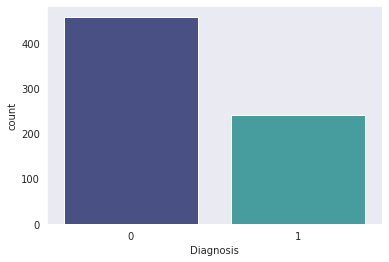

In [204]:
# Getting the frequency of the breast cancer diagnosis: 1 (Malignant) and 0 (Benign)

sns.set_style("dark")
sns.countplot(data = dataset, x = 'Diagnosis', palette = "mako")

In [205]:
dataset['Diagnosis'].value_counts()

0    458
1    241
Name: Diagnosis, dtype: int64

The graphs shows that the number of people dignosed with Breast Cancer sums upto 241 and the number of people who don't, sum upto 458

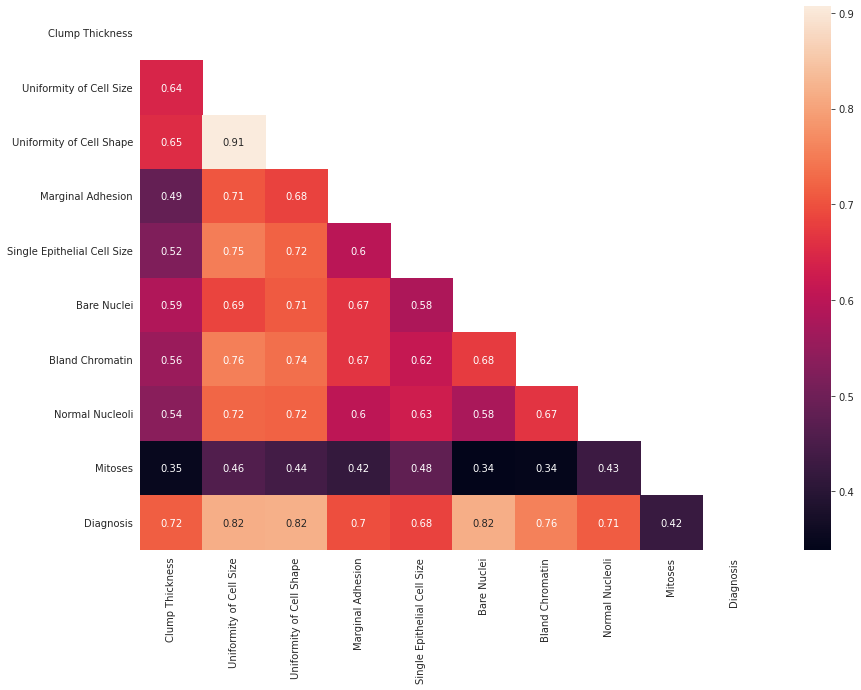

In [206]:
#Creating a correlation matrix to summarize the dataset

sns.set_style("whitegrid")
plt.figure(figsize=(14,10))

mask = np.triu(np.ones_like(dataset.corr()))
heatmap = sns.heatmap(dataset.corr(), mask=mask, annot=True)

Observations:

'Uniformity of Cell Size' and 'Uniformity of Cell Shape' are strongly correlated.

'Uniformity of Cell Size' and 'Uniformity of Cell Shape' strongly correlate with Diagnosis. The more the 'Uniformity of Cell Size' and 'Uniformity of Cell Shape', there are more chances the Breast Cancer is Malignant

'Mitoses' doesn't seem to be of much significance to the dignosis


## Applying Logistic Regression

In [207]:
#Set of independent variables/features
X = dataset.iloc[:,:-1].values

#Set of dependent variables
y = dataset.iloc[:,-1].values

In [208]:
#Splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train is Matrix of features containing the observations of the training set

X_test is the matrix of features containing the observations of the test set.

y_train is the dependent variable containing the observations of the training set.

y_test is the dependent variable vector containing the observations of the test.

In [209]:
# training the dataset

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [210]:
# pedicting the test set results

y_pred = classifier.predict(X_test)

In [211]:
# creating a confusion matrix 
# predicts the number of correct predictions and incorrect predictions made by the model

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # to compare the actual and predicted values
cm

# number of correct predictions when the tumor is benign , number or incorrect predictions when the tumor is benign(False positive)
# number of correct predictions when the tumor is malignant , number or incorrect predictions when the tumor is malignant(False negative)


array([[82,  3],
       [ 1, 54]])

Out of 85 women predicted to not have breast cancer, 3 were misclassified


Out of the 55 women predicted to have breast cancer, 1 was misclassified

In [212]:
# computing the accuracy with K-fold cross validation (10 fold)

from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print('Accuracy: ', accuracy_scores.mean())
print('Standard Deviation: ', accuracy_scores.std())

Accuracy:  0.9660389610389611
Standard Deviation:  0.025795735493308724
